In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick
def func(x, m,b):
    return m*x+b
los_colores = ['b', 'r', 'mediumaquamarine', 'darkgreen', 'limegreen', 'mediumorchid', 'darkmagenta', 'steelblue', 'orange', 'darkturquoise']


In [2]:
data_rod1 = np.loadtxt('./measured_spectra/rod_1.csv', \
                       skiprows=2, delimiter=';', dtype=float)
data_rod4 = np.loadtxt('./measured_spectra/rod_4.csv', \
                       skiprows=2, delimiter=';', dtype=float)
data_rod3 = np.loadtxt('./measured_spectra/rod_3.csv', \
                       skiprows=2, delimiter=';', dtype=float)
data_tpp1 = np.loadtxt('./measured_spectra/tpp_1.csv', \
                       skiprows=2, delimiter=';', dtype=float)
data_tpp2 = np.loadtxt('./measured_spectra/tpp_2.csv', \
                       skiprows=2, delimiter=';', dtype=float)

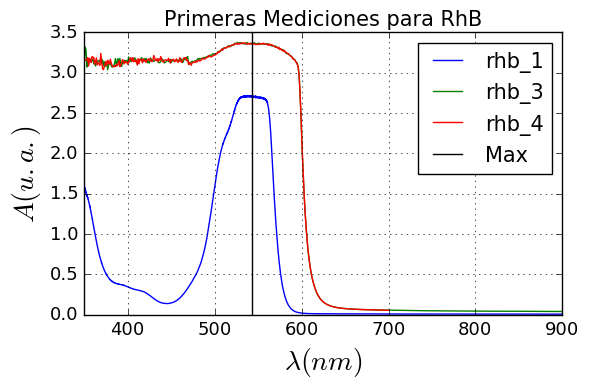

In [3]:
first, ax = plt.subplots(1, 1)
ax.plot(data_rod1[:,0], data_rod1[:,1], label='rhb_1')
ax.plot(data_rod3[:,0], data_rod3[:,1], label='rhb_3')
ax.plot(data_rod4[:,0], data_rod4[:,1], label='rhb_4')
ax.set_xlim(350, 900)
ax.set_ylim(0, 3.5)
ax.axvline(542.8, c='k', label='Max')
plt.legend(fontsize=15)
ax.set_title('Primeras Mediciones para RhB', fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
plt.xlabel('$\lambda(nm)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('failrhb.png', dpi=300)


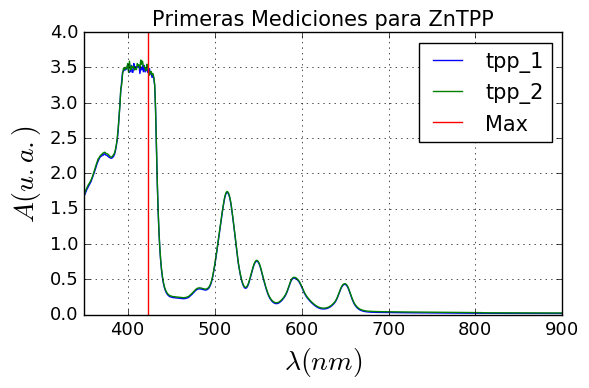

In [4]:
first, ax = plt.subplots(1, 1)
ax.plot(data_tpp1[:,0], data_tpp1[:,1], label='tpp_1')
ax.plot(data_tpp2[:,0], data_tpp2[:,1], label='tpp_2')
ax.set_xlim(350, 900)
ax.set_ylim(0, 4)
ax.axvline(422.8, c='r', label='Max')
plt.legend(fontsize=15)
ax.set_title('Primeras Mediciones para ZnTPP', fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
plt.xlabel('$\lambda(nm)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('failzntpp.png', dpi=300)

# Mediciones 16 Noviembre

A continuación se guardarán en una lista (`rhob_spectra`) de arreglos, los espectros correspondientes a las mediciones realizadas el 16 de Noviembre para la Rhodamina B. 

Se realizaron 8 mediciones a distintas concentraciones conocidas (`rhob_known_conc`). Se procedió de la siguiente manera:

+ 0.9mg de rhodamina en 20mL de CH3OH
+ Se incrementa la cantidad de solvente para disminuir la concentración, ya que se observa saturación en el espectro de absorbancia.
+ Se inicia agregando 5mL de solvente, luego se procede a agregar 10mL. Las cantidades exactas de solvente adicionadas se encuentran en el arreglo `rhob_solv_vol`.
+ Se consiguen los datos de coeficiente de extinción $\epsilon$ de [acá](http://omlc.org/spectra/PhotochemCAD/html/009.html).

In [5]:
rhob_m = 0.9e-3 #g
rhob_molar_m = 479.02 #g/mol
rhob_solv_vol = np.array([20, 25., 35, 45, 55, 62, 72, 82])*1e-3 #L
rhob_ext_coeff_raw = np.loadtxt('molar_ext_coeff.txt', dtype = float, skiprows=23)
rhob_ext_coeff_max = max(rhob_ext_coeff_raw[:,1])
rhob_spectra=[]
rhob_measure_n = np.arange(1,9)
rhob_max_abs=np.zeros([len(rhob_measure_n), 2])
rhob_max_2=np.zeros([len(rhob_measure_n), 2])
rhob_max_3=np.zeros([len(rhob_measure_n), 2])
rhob_ext_coeff = interp1d(rhob_ext_coeff_raw[:,0],rhob_ext_coeff_raw[:,1] , kind='cubic')
cut_tot =17
cut_2 = [100, 200]
cut_3 = [300, 350]
for i in range(len(rhob_measure_n)):
    data=np.loadtxt('./measured_spectra/rod_our_'+str(rhob_measure_n[i])+'.csv',\
                                   skiprows=2, dtype=float, delimiter=';')
    data2=data[cut_2[0]:cut_2[1]]
    data1=data[cut_tot:]
    data3=data[cut_3[0]:cut_3[1]]

    rhob_spectra.append(data1)

    rhob_max_abs[i,0]=np.mean(data1[:,0][data1[:,1]==max(data1[:,1])])
    rhob_max_abs[i,1]=max(data1[:,1])
    
    rhob_max_2[i,0]=np.mean(data2[:,0][data2[:,1]==max(data2[:,1])])
    rhob_max_2[i,1]=max(data2[:,1])
    
    rhob_max_3[i,0]=np.mean(data3[:,0][data3[:,1]==max(data3[:,1])])
    rhob_max_3[i,1]=max(data3[:,1])

rhob_known_conc = (rhob_m/rhob_molar_m)/rhob_solv_vol
rhob_known_conc_unc = rhob_known_conc*((0.1e-3/rhob_molar_m)/(rhob_m/rhob_molar_m) + (5e-7/rhob_solv_vol))

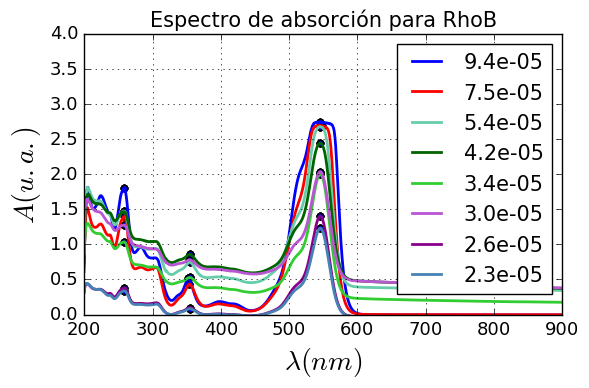

In [6]:
fig, ax = plt.subplots(1,1)
for i in range(len(rhob_measure_n)):
    plt.plot(rhob_spectra[i][:,0], rhob_spectra[i][:,1], label='%.1e'%rhob_known_conc[i], c=los_colores[i], lw=2)
    #plt.scatter(rhob_spectra[i][:,0][argrelextrema(rhob_spectra[i][:,1], np.greater)],\
    #            rhob_spectra[i][:,1][argrelextrema(rhob_spectra[i][:,1], np.greater)])
    plt.scatter(rhob_max_abs[:,0], rhob_max_abs[:,1])
    plt.scatter(rhob_max_2[:,0], rhob_max_2[:,1])
    plt.scatter(rhob_max_3[:,0], rhob_max_3[:,1])

    plt.grid()
ax.set_xlim(200, 900)
ax.set_ylim(0, 4)
plt.legend(fontsize=15)
ax.set_title(u'Espectro de absorción para RhoB', fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
plt.xlabel('$\lambda(nm)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.gcf()
plt.tight_layout()
plt.savefig('rhb_1.png', dpi=300)

/home/daniel/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0, 0.00012)

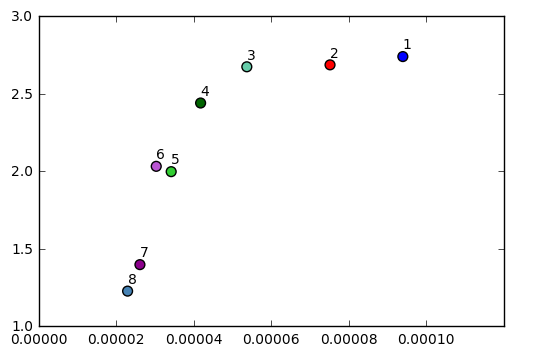

In [7]:
# Absorbancia en funcion de la concentración conocida
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_abs[:,1], c=los_colores, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
plt.legend()
plt.xlim(0, 0.00012)

(0, 0.00012)

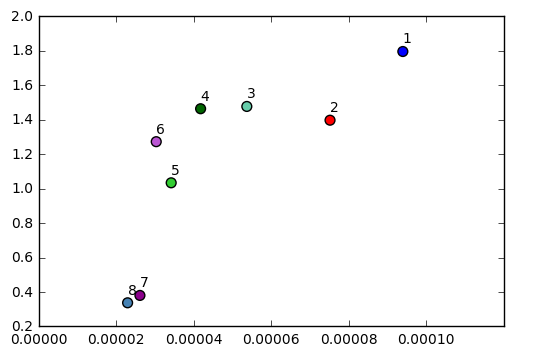

In [8]:
plt.scatter(rhob_known_conc, rhob_max_2[:,1], c=los_colores, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))
plt.xlim(0, 0.00012)

(0, 0.00012)

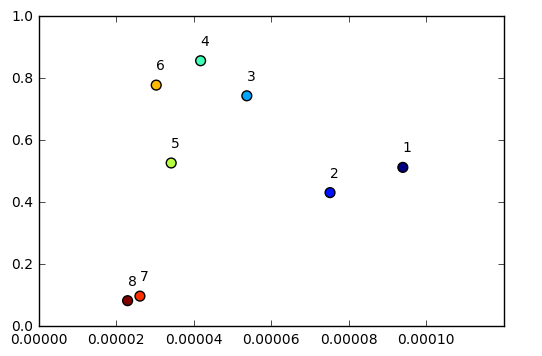

In [9]:
plt.scatter(rhob_known_conc, rhob_max_3[:,1], c=color, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))
plt.xlim(0, 0.00012)

Recordemos que la absorbancia se relaciona con la concentración mediante
$$A=\epsilon c l,\ l=1cm$$

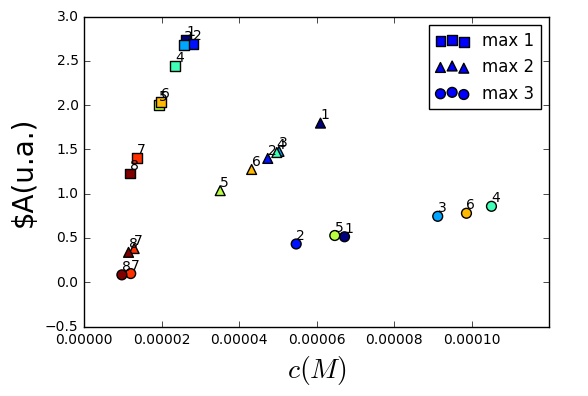

In [10]:
rhob_calc_conc_abs = []
rhob_calc_conc_2 = []
rhob_calc_conc_3 = []

for i in range(len(rhob_known_conc)):
    rhob_calc_conc_abs.append(rhob_max_abs[i,1]/rhob_ext_coeff(rhob_max_abs[i,0]))
    rhob_calc_conc_2.append(rhob_max_2[i,1]/rhob_ext_coeff(rhob_max_2[i,0]))
    rhob_calc_conc_3.append(rhob_max_3[i,1]/rhob_ext_coeff(rhob_max_3[i,0]))

rhob_calc_conc_abs = np.array(rhob_calc_conc_abs)
rhob_calc_conc_2 = np.array(rhob_calc_conc_2)
rhob_calc_conc_3 = np.array(rhob_calc_conc_3)

plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='max 1')
plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='^', label='max 2')
plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='o', label='max 3')
for i in range(len(rhob_known_conc)):
    plt.text(rhob_calc_conc_abs[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_2[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_3[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))
plt.xlim(0, 0.00012)
plt.legend()
plt.xlabel('$c(M)$', fontsize=20)
plt.ylabel('$A(u.a.)', fontsize=20)

46823.9571993 104244.807088


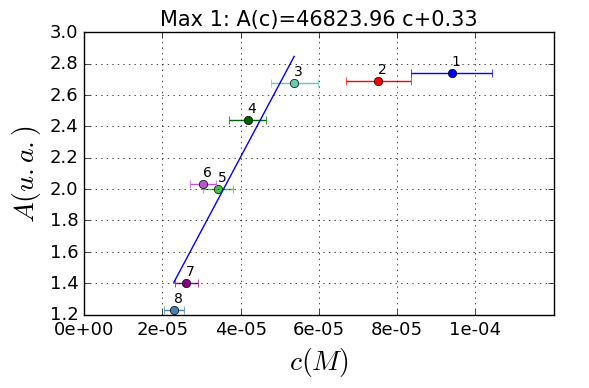

In [11]:
fig, ax=plt.subplots(1, 1)
color=np.linspace(0, 1, len(rhob_known_conc))
for i in range(len(rhob_known_conc)):
    plt.errorbar(rhob_known_conc[i], rhob_max_abs[i,1], xerr = rhob_known_conc_unc[i], fmt ='o',c=los_colores[i])
#plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
    #plt.text(rhob_calc_conc_abs[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00012)


rhob_abs_popt, rhob_abs_pcov = curve_fit(func, \
                                           rhob_known_conc[2:], rhob_max_abs[2:,1])
plt.plot(rhob_known_conc[2:], func(rhob_known_conc[2:],*rhob_abs_popt))
print rhob_abs_popt[0], rhob_ext_coeff(rhob_max_abs[0,0])
plt.legend(loc=4,fontsize=15)
ax.set_title('Max 1: A(c)=%.2f c+%.2f'%(tuple(rhob_abs_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.xlabel('$c(M)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('rhb_m1.png', dpi=300)

16112.9020788 29467.6712039


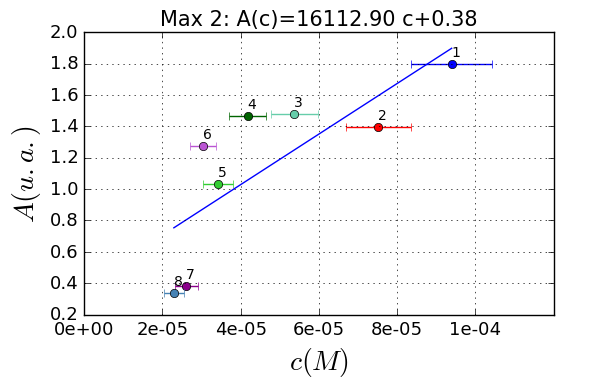

In [12]:
fig, ax=plt.subplots(1, 1)
color=np.linspace(0, 1, len(rhob_known_conc))
for i in range(len(rhob_known_conc)):
    plt.errorbar(rhob_known_conc[i], rhob_max_2[i,1], xerr = rhob_known_conc_unc[i], fmt ='o',c=los_colores[i])#plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))
    #plt.text(rhob_calc_conc_2[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00012)


rhob_2_popt, rhob_2_pcov = curve_fit(func, \
                                           rhob_known_conc[:], rhob_max_2[:,1])
plt.plot(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_2_popt))
print rhob_2_popt[0], rhob_ext_coeff(rhob_max_2[0,0])
plt.legend(loc=4,fontsize=15)
ax.set_title('Max 2: A(c)=%.2f c+%.2f'%(tuple(rhob_2_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.xlabel('$c(M)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('rhb_m2.png', dpi=300)

2625.4155526 7639.05404243


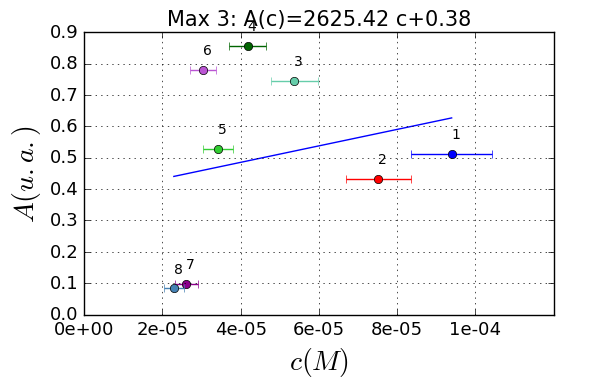

In [13]:
fig, ax=plt.subplots(1, 1)
color=np.linspace(0, 1, len(rhob_known_conc))
for i in range(len(rhob_known_conc)):
    plt.errorbar(rhob_known_conc[i], rhob_max_3[i,1], xerr = rhob_known_conc_unc[i], fmt ='o',c=los_colores[i])#plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))
 #   plt.text(rhob_calc_conc_3[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00012)


rhob_3_popt, rhob_3_pcov = curve_fit(func, \
                                           rhob_known_conc[:], rhob_max_3[:,1])
plt.plot(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_3_popt))
print rhob_3_popt[0], rhob_ext_coeff(rhob_max_3[0,0])
plt.legend(loc=4,fontsize=15)
ax.set_title('Max 3: A(c)=%.2f c+%.2f'%(tuple(rhob_3_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.xlabel('$c(M)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('rhb_m3.png', dpi=300)

# Mediciones 17 de noviembre
En este caso se cambió la técnica experimental. Se comenzó con 1.1g de ZnTPP en 20mL de tolueno. Luego, a la muestra de la cuña de cuarzo del espectrofotómetro se le varió la cantidad de solvente, se extrajo cada vez la mitad de la muestra y se reemplazó por tolueno, logrando así "mejores" mediciones.

In [14]:
zntpp_m = 1.1e-3 #g
zntpp_molar_m = 678.116 #g/mol
zntpp_solv_vol = np.array([40, 80, 160, 320, 640, 2*640])*1e-3*2 #L
zntpp_ext_coeff_raw = np.loadtxt('zntpp_molar_ext_coeff.txt', dtype = float, skiprows=23)
zntpp_ext_coeff_max = max(zntpp_ext_coeff_raw[:,1])
zntpp_spectra=[]
zntpp_measure_n = np.arange(2,8)
zntpp_max_abs=np.zeros([len(zntpp_measure_n), 2])
zntpp_max_2=np.zeros([len(zntpp_measure_n), 2])
zntpp_max_3=np.zeros([len(zntpp_measure_n), 2])
zntpp_ext_coeff = interp1d(zntpp_ext_coeff_raw[:,0],zntpp_ext_coeff_raw[:,1] , kind='cubic')
cut_tot =0
cut_2 = [450, 550]
for i in range(len(zntpp_measure_n)):
    data=np.loadtxt('./measured_spectra/tpp_our_'+str(zntpp_measure_n[i])+'.csv',\
                                   skiprows=2, dtype=float, delimiter=';')
    data2=data[cut_2[0]:cut_2[1]]
    data1=data[cut_tot:]
    data3=data[cut_3[0]:cut_3[1]]

    zntpp_spectra.append(data1)

    zntpp_max_abs[i,0]=np.mean(data1[:,0][data1[:,1]==max(data1[:,1])])
    zntpp_max_abs[i,1]=max(data1[:,1])
    
    zntpp_max_2[i,0]=np.mean(data2[:,0][data2[:,1]==max(data2[:,1])])
    zntpp_max_2[i,1]=max(data2[:,1])
    
   

zntpp_known_conc = (zntpp_m/zntpp_molar_m)/zntpp_solv_vol
zntpp_known_conc_unc = zntpp_known_conc*((0.1e-3/zntpp_molar_m)/(zntpp_m/zntpp_molar_m) + (5e-7/zntpp_solv_vol))

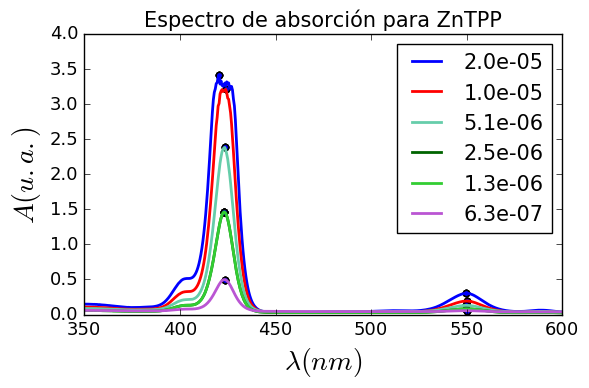

In [15]:
fig, ax = plt.subplots(1,1)
for i in range(len(zntpp_measure_n)):
    plt.plot(zntpp_spectra[i][:,0], zntpp_spectra[i][:,1], label='%.1e'%zntpp_known_conc[i], c=los_colores[i], lw=2)
    #plt.scatter(zntpp_spectra[i][:,0][argrelextrema(zntpp_spectra[i][:,1], np.greater)],\
    #            zntpp_spectra[i][:,1][argrelextrema(zntpp_spectra[i][:,1], np.greater)])
    plt.scatter(zntpp_max_abs[:,0], zntpp_max_abs[:,1])
    plt.scatter(zntpp_max_2[:,0], zntpp_max_2[:,1])

    plt.grid()
ax.set_xlim(350, 600)
ax.set_ylim(0, 4)
plt.legend(fontsize=15)
ax.set_title(u'Espectro de absorción para ZnTPP', fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.xlabel('$\lambda(nm)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('zntpp_1.png', dpi=300)

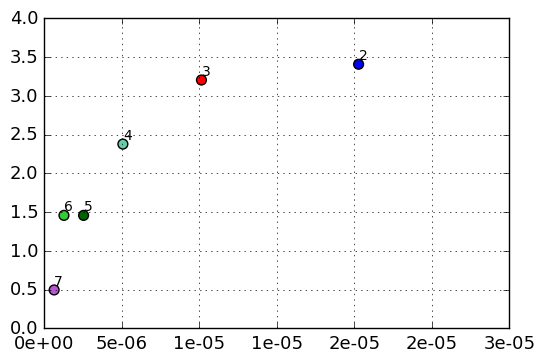

In [16]:
# Absorbancia en funcion de la concentración conocida
fig, ax = plt.subplots(1,1)
color=np.linspace(0, 1, len(zntpp_known_conc))
plt.scatter(zntpp_known_conc, zntpp_max_abs[:,1], c=los_colores, s=50)
for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_known_conc[i], zntpp_max_abs[i,1]+0.06, str(zntpp_measure_n[i]))
plt.legend()
plt.xlim(0, 0.00003)
plt.legend(loc=4,fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

(0, 6e-05)

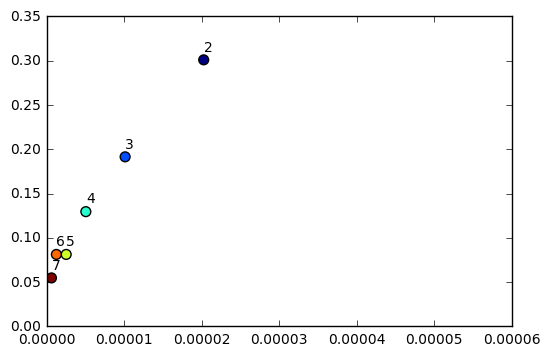

In [17]:
plt.scatter(zntpp_known_conc, zntpp_max_2[:,1], c=color, s=50)
for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_known_conc[i], zntpp_max_2[i,1]+0.01, str(zntpp_measure_n[i]))
plt.xlim(0, 0.00006)

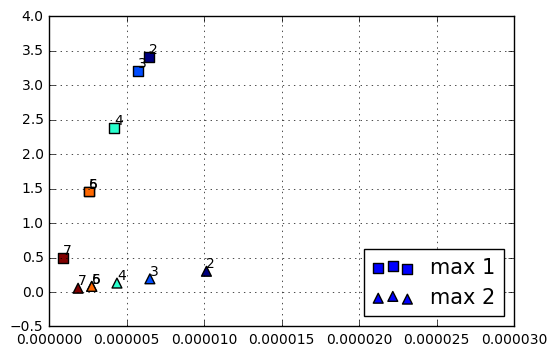

In [18]:
zntpp_calc_conc_abs = []
zntpp_calc_conc_2 = []

for i in range(len(zntpp_known_conc)):
    zntpp_calc_conc_abs.append(zntpp_max_abs[i,1]/zntpp_ext_coeff(zntpp_max_abs[i,0]))
    zntpp_calc_conc_2.append(zntpp_max_2[i,1]/zntpp_ext_coeff(zntpp_max_2[i,0]))

zntpp_calc_conc_abs = np.array(zntpp_calc_conc_abs)
zntpp_calc_conc_2 = np.array(zntpp_calc_conc_2)

plt.scatter(zntpp_calc_conc_abs, zntpp_max_abs[:,1], c=color, s=50, marker='s', label='max 1')
plt.scatter(zntpp_calc_conc_2, zntpp_max_2[:,1], c=color, s=50, marker='^', label='max 2')
for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_calc_conc_abs[i], zntpp_max_abs[i,1]+0.05, str(zntpp_measure_n[i]))
    plt.text(zntpp_calc_conc_2[i], zntpp_max_2[i,1]+0.05, str(zntpp_measure_n[i]))
plt.xlim(0, 0.00003)
plt.legend(loc=4,fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

359863.221582 531829.530857
109476.736196 0.319779071563


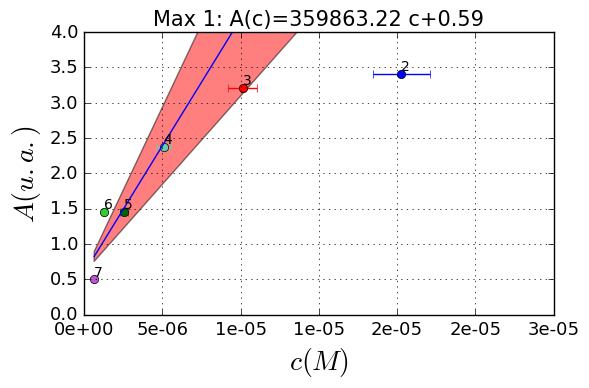

In [19]:
fig, ax = plt.subplots(1,1)
color=np.linspace(0, 1, len(zntpp_known_conc))
for i in range(len(zntpp_known_conc)):
    plt.errorbar(zntpp_known_conc[i], zntpp_max_abs[i,1], xerr = zntpp_known_conc_unc[i], fmt ='o',c=los_colores[i])
#plt.scatter(zntpp_calc_conc_abs, zntpp_max_abs[:,1], c=color, s=50, marker='s', label='calc')
#plt.scatter(zntpp_calc_conc_abs, zntpp_max_abs[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_known_conc[i], zntpp_max_abs[i,1]+0.05, str(zntpp_measure_n[i]))
   # plt.text(zntpp_calc_conc_abs[i], zntpp_max_abs[i,1]+0.05, str(zntpp_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00003)


zntpp_abs_popt, zntpp_abs_pcov = curve_fit(func, \
                                           zntpp_known_conc[2:], zntpp_max_abs[2:,1])
plt.plot(zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_abs_popt))
print zntpp_abs_popt[0], zntpp_ext_coeff(zntpp_max_abs[0,0])
plt.legend(loc=4,fontsize=15)
unc_cov = np.sqrt(zntpp_abs_pcov[0,0])+np.sqrt(zntpp_abs_pcov[1,1])
print np.sqrt(zntpp_abs_pcov[0,0]), np.sqrt(zntpp_abs_pcov[1,1])
plt.fill_between(zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_abs_popt)-unc_cov*zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_abs_popt)+unc_cov*zntpp_known_conc[:],facecolor='r',alpha=0.5)
ax.set_title('Max 1: A(c)=%.2f c+%.2f'%(tuple(zntpp_abs_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
ax.set_ylim(0,4)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.xlabel('$c(M)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('zntpp_m1.png', dpi=300)

7.13334313474e-07 1.13702188394e-06
[  2.34481581e-06  -1.01998899e-06]


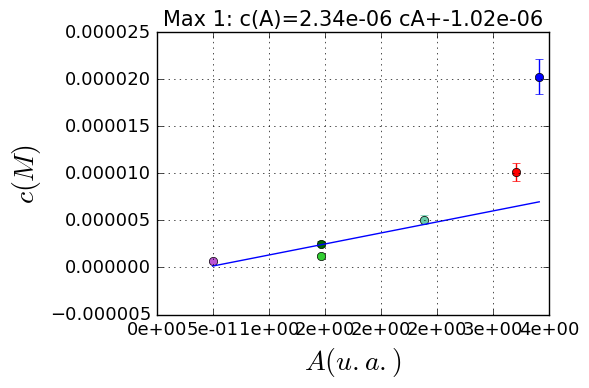

In [20]:
fig, ax = plt.subplots(1,1)
color=np.linspace(0, 1, len(zntpp_known_conc))
for i in range(len(zntpp_known_conc)):
    plt.errorbar(zntpp_max_abs[i,1],zntpp_known_conc[i], yerr = zntpp_known_conc_unc[i], fmt ='o',c=los_colores[i])
#plt.scatter(zntpp_calc_conc_abs, zntpp_max_abs[:,1], c=color, s=50, marker='s', label='calc')
#plt.scatter(zntpp_calc_conc_abs, zntpp_max_abs[:,1], c=color, s=50, marker='s', label='calc')


plt.legend(loc=4)


zntpp_abs_popt, zntpp_abs_pcov = curve_fit(func, \
                                           zntpp_max_abs[2:,1],zntpp_known_conc[2:])
plt.plot(zntpp_max_abs[:,1], func(zntpp_max_abs[:,1],*zntpp_abs_popt))
unc_cov = np.sqrt(zntpp_abs_pcov[0,0])+np.sqrt(zntpp_abs_pcov[1,1])
print np.sqrt(zntpp_abs_pcov[0,0]), np.sqrt(zntpp_abs_pcov[1,1])
plt.fill_between(zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_abs_popt)-unc_cov*zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_abs_popt)+unc_cov*zntpp_known_conc[:],facecolor='r',alpha=0.5)
ax.set_title('Max 1: c(A)=%.2e cA+%.2e'%(tuple(zntpp_abs_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.ylabel('$c(M)$', fontsize=20)
plt.xlabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
print zntpp_abs_popt

12249.8708952 29690.0340919
627.988190346 0.00600192973935


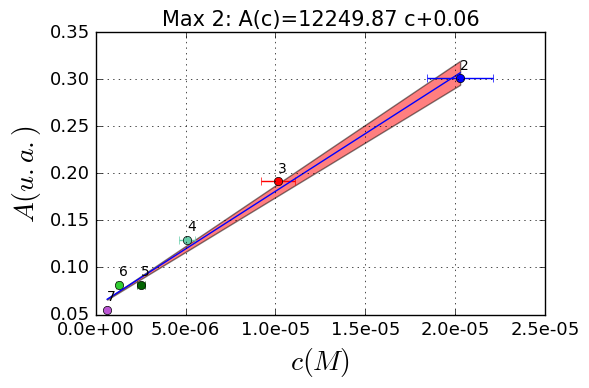

In [21]:

fig, ax = plt.subplots(1, 1)
for i in range(len(zntpp_known_conc)):
    plt.errorbar(zntpp_known_conc[i], zntpp_max_2[i,1], xerr = zntpp_known_conc_unc[i], fmt ='o',c=los_colores[i])#plt.scatter(zntpp_calc_conc_2, zntpp_max_2[:,1], c=color, s=50, marker='^', label='calc')

for i in range(len(zntpp_known_conc)):
    plt.text(zntpp_known_conc[i], zntpp_max_2[i,1]+0.01, str(zntpp_measure_n[i]))
  #  plt.text(zntpp_calc_conc_2[i], zntpp_max_2[i,1]+0.01, str(zntpp_measure_n[i]))

plt.xlim(0, 0.000025)
plt.legend(loc=4)

zntpp_2_popt, zntpp_2_pcov = curve_fit(func, \
                                           zntpp_known_conc[:], zntpp_max_2[:,1])
#zntpp_2_popt*=2

plt.plot(zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_2_popt))
print zntpp_2_popt[0], zntpp_ext_coeff(zntpp_max_2[0,0])
plt.legend(loc=4,fontsize=15)
ax.set_title('Max 2: A(c)=%.2f c+%.2f'%(tuple(zntpp_2_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
unc_cov = np.sqrt(zntpp_2_pcov[0,0])+np.sqrt(zntpp_2_pcov[1,1])
print np.sqrt(zntpp_2_pcov[0,0]), np.sqrt(zntpp_2_pcov[1,1])
plt.fill_between(zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_2_popt)-unc_cov*zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_2_popt)+unc_cov*zntpp_known_conc[:],facecolor='r',alpha=0.5)
plt.xlabel('$c(M)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('zntpp_m2.png', dpi=300)

1.23647744083e-05 1.12340251676e-06
[  6.04353620e-05  -2.86658404e-06]


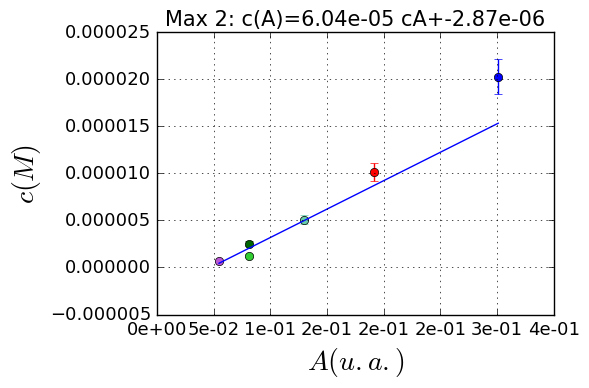

In [22]:
fig, ax = plt.subplots(1,1)
color=np.linspace(0, 1, len(zntpp_known_conc))
for i in range(len(zntpp_known_conc)):
    plt.errorbar(zntpp_max_2[i,1],zntpp_known_conc[i], yerr = zntpp_known_conc_unc[i], fmt ='o',c=los_colores[i])
#plt.scatter(zntpp_calc_conc_2, zntpp_max_2[:,1], c=color, s=50, marker='s', label='calc')
#plt.scatter(zntpp_calc_conc_2, zntpp_max_2[:,1], c=color, s=50, marker='s', label='calc')


plt.legend(loc=4)


zntpp_2_popt, zntpp_2_pcov = curve_fit(func, \
                                           zntpp_max_2[2:,1],zntpp_known_conc[2:])
plt.plot(zntpp_max_2[:,1], func(zntpp_max_2[:,1],*zntpp_2_popt))
unc_cov = np.sqrt(zntpp_2_pcov[0,0])+np.sqrt(zntpp_2_pcov[1,1])
print np.sqrt(zntpp_2_pcov[0,0]), np.sqrt(zntpp_2_pcov[1,1])
plt.fill_between(zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_2_popt)-unc_cov*zntpp_known_conc[:], func(zntpp_known_conc[:],*zntpp_2_popt)+unc_cov*zntpp_known_conc[:],facecolor='r',alpha=0.5)
ax.set_title('Max 2: c(A)=%.2e cA+%.2e'%(tuple(zntpp_2_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.ylabel('$c(M)$', fontsize=20)
plt.xlabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
print zntpp_2_popt

# Mediciones 22 de Noviembre

In [23]:
rhob_m = 0.9e-3 #g
rhob_molar_m = 479.02 #g/mol
rhob_solv_vol = 82e-3 *(3./2)**np.arange(1,11) #L
rhob_ext_coeff_raw = np.loadtxt('molar_ext_coeff.txt', dtype = float, skiprows=23)
rhob_ext_coeff_max = max(rhob_ext_coeff_raw[:,1])
rhob_spectra=[]
rhob_measure_n = np.arange(1,11)
rhob_max_abs=np.zeros([len(rhob_measure_n), 2])
rhob_max_2=np.zeros([len(rhob_measure_n), 2])
rhob_max_3=np.zeros([len(rhob_measure_n), 2])
print rhob_ext_coeff_raw[:,0][-1]
#rhob_ext_coeff = interp1d(rhob_ext_coeff_raw[:,0],rhob_ext_coeff_raw[:,1] , kind='cubic')
cut_tot =60
cut_2 = [100, 200]
cut_3 = [300, 350]
for i in range(len(rhob_measure_n)):
    data=np.loadtxt('./measured_spectra/rod_our_'+str(rhob_measure_n[i])+'_nov22'+'.csv',\
                                   skiprows=2, dtype=float, delimiter=';')
    data2=data[cut_2[0]:cut_2[1]]
    data1=data[cut_tot:-900]
    data3=data[cut_3[0]:cut_3[1]]

    rhob_spectra.append(data1)

    rhob_max_abs[i,0]=np.mean(data1[:,0][data1[:,1]==max(data1[:,1])])
    rhob_max_abs[i,1]=max(data1[:,1])
    
    rhob_max_2[i,0]=np.mean(data2[:,0][data2[:,1]==max(data2[:,1])])
    rhob_max_2[i,1]=max(data2[:,1])
    
    rhob_max_3[i,0]=np.mean(data3[:,0][data3[:,1]==max(data3[:,1])])
    rhob_max_3[i,1]=max(data3[:,1])
print rhob_spectra[0][-1,0]
rhob_known_conc_0 = (0.9e-3/rhob_molar_m)/82e-3
rhob_known_conc = rhob_known_conc_0*(2./3)**np.arange(1,11)
rhob_known_conc_unc = rhob_known_conc*((0.1e-3/rhob_molar_m)/(rhob_m/rhob_molar_m) + (5e-7/rhob_solv_vol))

700.0
650.0


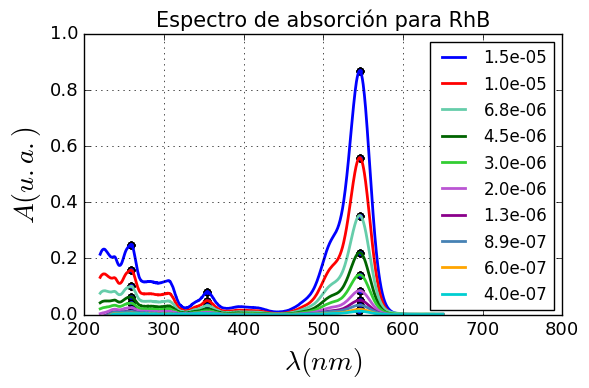

In [24]:
fig, ax=plt.subplots(1, 1)
for i in range(len(rhob_measure_n)):
    plt.plot(rhob_spectra[i][:,0], rhob_spectra[i][:,1], label='%.1e'%rhob_known_conc[i], c=los_colores[i], lw=2)
    #plt.scatter(rhob_spectra[i][:,0][argrelextrema(rhob_spectra[i][:,1], np.greater)],\
    #            rhob_spectra[i][:,1][argrelextrema(rhob_spectra[i][:,1], np.greater)])
    plt.scatter(rhob_max_abs[:,0], rhob_max_abs[:,1])
    plt.scatter(rhob_max_2[:,0], rhob_max_2[:,1])
    plt.scatter(rhob_max_3[:,0], rhob_max_3[:,1])

    plt.grid()
ax.set_xlim(200, 800)
ax.set_ylim(0, 1)
plt.legend(fontsize=12)
ax.set_title(u'Espectro de absorción para RhB', fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.xlabel('$\lambda(nm)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.grid()
plt.savefig('rhb_2.png', dpi=300)

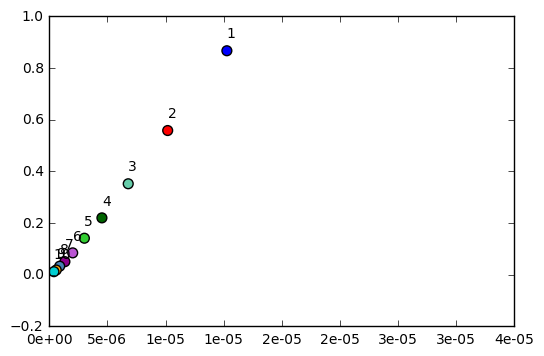

In [25]:
# Absorbancia en funcion de la concentración conocida
color=np.linspace(0, 1, len(rhob_known_conc))
plt.scatter(rhob_known_conc, rhob_max_abs[:,1], c=los_colores, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
plt.legend()
plt.xlim(0, 0.00004)
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

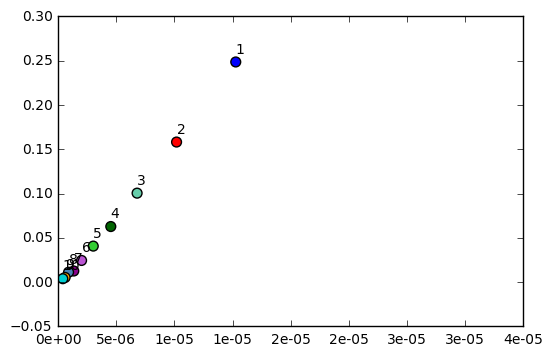

In [26]:
plt.scatter(rhob_known_conc, rhob_max_2[:,1], c=los_colores, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_2[i,1]+0.01, str(rhob_measure_n[i]))
plt.xlim(0, 0.00004)
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

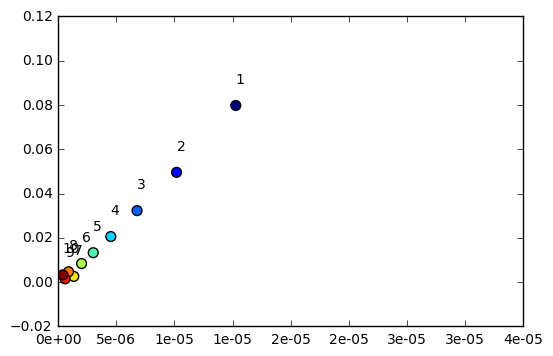

In [27]:
plt.scatter(rhob_known_conc, rhob_max_3[:,1], c=color, s=50)
for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_3[i,1]+0.01, str(rhob_measure_n[i]))
plt.xlim(0, 0.00004)
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))


Recordemos que la absorbancia se relaciona con la concentración mediante
$$A=\epsilon c l,\ l=1cm$$

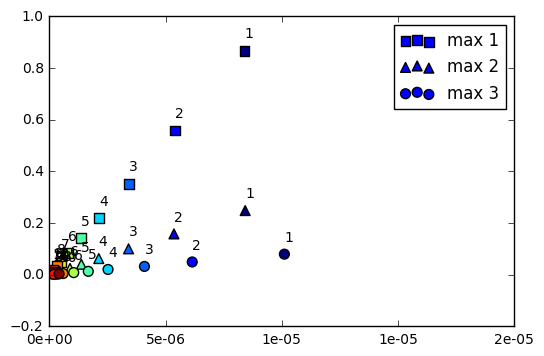

In [28]:
rhob_calc_conc_abs = []
rhob_calc_conc_2 = []
rhob_calc_conc_3 = []

for i in range(len(rhob_known_conc)):
    rhob_calc_conc_abs.append(rhob_max_abs[i,1]/rhob_ext_coeff(rhob_max_abs[i,0]))
    rhob_calc_conc_2.append(rhob_max_2[i,1]/rhob_ext_coeff(rhob_max_2[i,0]))
    rhob_calc_conc_3.append(rhob_max_3[i,1]/rhob_ext_coeff(rhob_max_3[i,0]))

rhob_calc_conc_abs = np.array(rhob_calc_conc_abs)
rhob_calc_conc_2 = np.array(rhob_calc_conc_2)
rhob_calc_conc_3 = np.array(rhob_calc_conc_3)

plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='max 1')
plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='^', label='max 2')
plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='o', label='max 3')
for i in range(len(rhob_known_conc)):
    plt.text(rhob_calc_conc_abs[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_2[i], rhob_max_2[i,1]+0.05, str(rhob_measure_n[i]))
    plt.text(rhob_calc_conc_3[i], rhob_max_3[i,1]+0.05, str(rhob_measure_n[i]))
plt.xlim(0, 2e-5)
plt.legend()
ax=plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))


57582.8945404 103274.154702
760.546901993 0.00492811339302


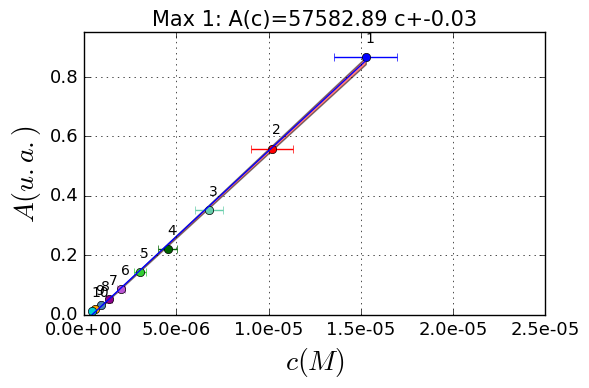

In [29]:
fig, ax = plt.subplots(1, 1)
color=np.linspace(0, 1, len(rhob_known_conc))
for i in range(len(rhob_known_conc)):
    plt.errorbar(rhob_known_conc[i], rhob_max_abs[i,1], xerr = rhob_known_conc_unc[i], fmt ='o',c=los_colores[i])#plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))
  #  plt.text(rhob_calc_conc_abs[i], rhob_max_abs[i,1]+0.05, str(rhob_measure_n[i]))

plt.xlim(0, 0.00006)


rhob_abs_popt, rhob_abs_pcov = curve_fit(func, \
                                           rhob_known_conc[:], rhob_max_abs[:,1])
#rhob_abs_popt*=2
plt.plot(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_abs_popt))
print rhob_abs_popt[0], rhob_ext_coeff(rhob_max_abs[0,0])
ax=plt.gca()
plt.xlim(0, 2.5e-5)
plt.ylim(0, 0.95)

ax.set_title('Max 1: A(c)=%.2f c+%.2f'%(tuple(rhob_abs_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
unc_cov = np.sqrt(rhob_abs_pcov[0,0])+np.sqrt(rhob_abs_pcov[1,1])
print np.sqrt(rhob_abs_pcov[0,0]),np.sqrt(rhob_abs_pcov[1,1])
plt.fill_between(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_abs_popt)-unc_cov*rhob_known_conc[:], func(rhob_known_conc[:],*rhob_abs_popt)+unc_cov*rhob_known_conc[:],facecolor='r',alpha=0.5)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.xlabel('$c(M)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('rhb_m11.png', dpi=300)

3.38038188574e-07 5.39838249624e-08
[  1.86993237e-05   3.11751602e-07]


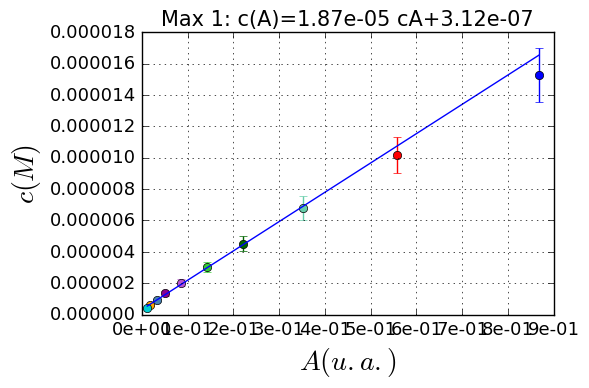

In [30]:
fig, ax = plt.subplots(1,1)
color=np.linspace(0, 1, len(rhob_known_conc))
for i in range(len(rhob_known_conc)):
    plt.errorbar(rhob_max_abs[i,1],rhob_known_conc[i], yerr = rhob_known_conc_unc[i], fmt ='o',c=los_colores[i])
#plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='calc')
#plt.scatter(rhob_calc_conc_abs, rhob_max_abs[:,1], c=color, s=50, marker='s', label='calc')


plt.legend(loc=4)


rhob_abs_popt, rhob_abs_pcov = curve_fit(func, \
                                           rhob_max_abs[2:,1],rhob_known_conc[2:])
plt.plot(rhob_max_abs[:,1], func(rhob_max_abs[:,1],*rhob_abs_popt))
unc_cov = np.sqrt(rhob_abs_pcov[0,0])+np.sqrt(rhob_abs_pcov[1,1])
print np.sqrt(rhob_abs_pcov[0,0]), np.sqrt(rhob_abs_pcov[1,1])
plt.fill_between(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_abs_popt)-unc_cov*rhob_known_conc[:], func(rhob_known_conc[:],*rhob_abs_popt)+unc_cov*rhob_known_conc[:],facecolor='r',alpha=0.5)
ax.set_title('Max 1: c(A)=%.2e cA+%.2e'%(tuple(rhob_abs_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.ylabel('$c(M)$', fontsize=20)
plt.xlabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
print rhob_abs_popt

16441.2859 29509.9070479
254.337122472 0.0016480274258


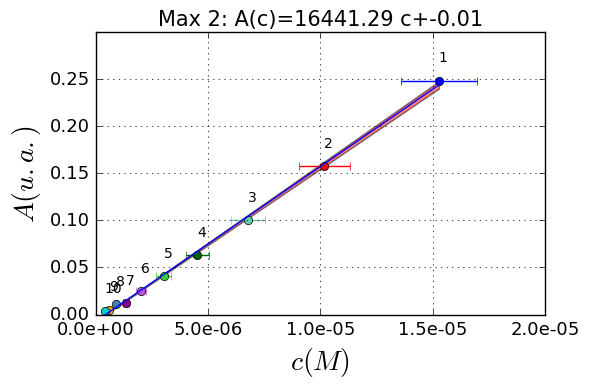

In [31]:
color=np.linspace(0, 1, len(rhob_known_conc))
for i in range(len(rhob_known_conc)):
    plt.errorbar(rhob_known_conc[i], rhob_max_2[i,1], xerr = rhob_known_conc_unc[i], fmt ='o',c=los_colores[i])#plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='s', label='calc')
#plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_2[i,1]+0.02, str(rhob_measure_n[i]))
  #  plt.text(rhob_calc_conc_2[i], rhob_max_2[i,1]+0.02, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00012)


rhob_2_popt, rhob_2_pcov = curve_fit(func, \
                                           rhob_known_conc[:], rhob_max_2[:,1])
#rhob_2_popt*=2
plt.plot(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_2_popt))
print rhob_2_popt[0], rhob_ext_coeff(rhob_max_2[0,0])
ax=plt.gca()
plt.xlim(0, 2e-5)
plt.ylim(0,0.3)
plt.legend(loc=4,fontsize=15)
ax.set_title('Max 2: A(c)=%.2f c+%.2f'%(tuple(rhob_2_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
unc_cov = np.sqrt(rhob_2_pcov[0,0])+np.sqrt(rhob_2_pcov[1,1])
print np.sqrt(rhob_2_pcov[0,0]),np.sqrt(rhob_2_pcov[1,1])
plt.fill_between(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_2_popt)-unc_cov*rhob_known_conc[:], func(rhob_known_conc[:],*rhob_2_popt)+unc_cov*rhob_known_conc[:],facecolor='r',alpha=0.5)
plt.xlabel('$c(M)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('rhb_m22.png', dpi=300)

1.62953214353e-06 7.42920359869e-08
[  6.56464123e-05   3.00696048e-07]


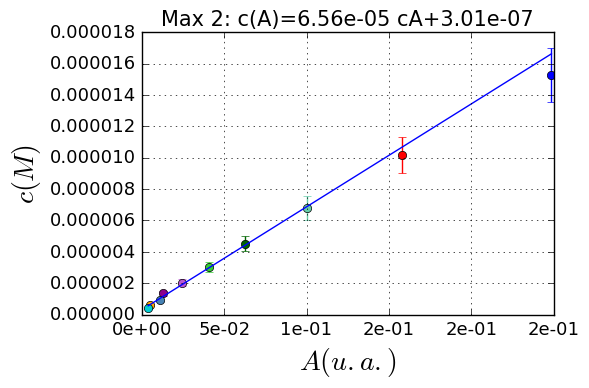

In [32]:
fig, ax = plt.subplots(1,1)
color=np.linspace(0, 1, len(rhob_known_conc))
for i in range(len(rhob_known_conc)):
    plt.errorbar(rhob_max_2[i,1],rhob_known_conc[i], yerr = rhob_known_conc_unc[i], fmt ='o',c=los_colores[i])
#plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='s', label='calc')
#plt.scatter(rhob_calc_conc_2, rhob_max_2[:,1], c=color, s=50, marker='s', label='calc')


plt.legend(loc=4)


rhob_2_popt, rhob_2_pcov = curve_fit(func, \
                                           rhob_max_2[2:,1],rhob_known_conc[2:])
plt.plot(rhob_max_2[:,1], func(rhob_max_2[:,1],*rhob_2_popt))
unc_cov = np.sqrt(rhob_2_pcov[0,0])+np.sqrt(rhob_2_pcov[1,1])
print np.sqrt(rhob_2_pcov[0,0]), np.sqrt(rhob_2_pcov[1,1])
plt.fill_between(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_2_popt)-unc_cov*rhob_known_conc[:], func(rhob_known_conc[:],*rhob_2_popt)+unc_cov*rhob_known_conc[:],facecolor='r',alpha=0.5)
ax.set_title('Max 2: c(A)=%.2e cA+%.2e'%(tuple(rhob_2_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.ylabel('$c(M)$', fontsize=20)
plt.xlabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
print rhob_2_popt

5206.95838946 7892.65992832
130.446605771 0.000845254423322


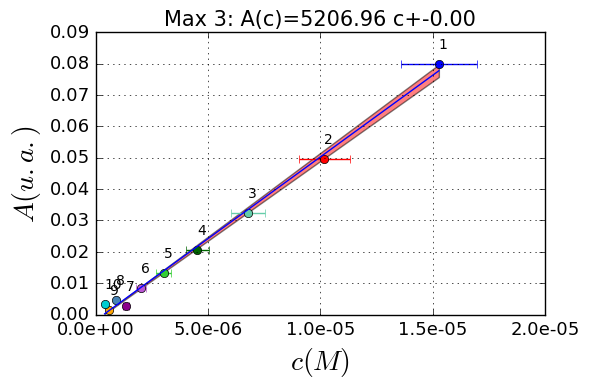

In [33]:
color=np.linspace(0, 1, len(rhob_known_conc))
for i in range(len(rhob_known_conc)):
    plt.errorbar(rhob_known_conc[i], rhob_max_3[i,1], xerr = rhob_known_conc_unc[i], fmt ='o',c=los_colores[i])#plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='s', label='calc')
#plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='s', label='calc')

for i in range(len(rhob_known_conc)):
    plt.text(rhob_known_conc[i], rhob_max_3[i,1]+0.005, str(rhob_measure_n[i]))
 #   plt.text(rhob_calc_conc_3[i], rhob_max_3[i,1]+0.01, str(rhob_measure_n[i]))

plt.legend(loc=4)
plt.xlim(0, 0.00004)


rhob_3_popt, rhob_3_pcov = curve_fit(func, \
                                           rhob_known_conc[:], rhob_max_3[:,1])
#rhob_3_popt*=2
plt.plot(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_3_popt))
print rhob_3_popt[0], rhob_ext_coeff(rhob_max_3[0,0])
ax=plt.gca()
plt.xlim(0, 2e-5)
plt.ylim(0, 0.09)
plt.legend(loc=4,fontsize=15)
ax.set_title('Max 3: A(c)=%.2f c+%.2f'%(tuple(rhob_3_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
unc_cov = np.sqrt(rhob_3_pcov[0,0])+np.sqrt(rhob_3_pcov[1,1])
print np.sqrt(rhob_3_pcov[0,0]),np.sqrt(rhob_3_pcov[1,1])
plt.fill_between(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_3_popt)-unc_cov*rhob_known_conc[:], func(rhob_known_conc[:],*rhob_3_popt)+unc_cov*rhob_known_conc[:],facecolor='r',alpha=0.5)
plt.xlabel('$c(M)$', fontsize=20)
plt.ylabel('$A(u.a.)$', fontsize=20)
plt.tight_layout()
plt.savefig('rhb_m33.png', dpi=300)

2.18451827247e-05 2.20594627954e-07
[  2.08950781e-04   2.02322034e-07]


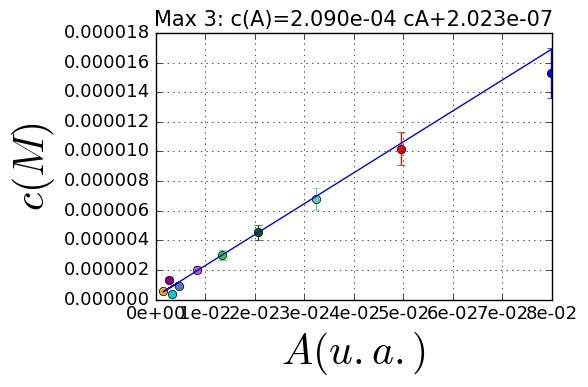

In [34]:
fig, ax = plt.subplots(1,1)
color=np.linspace(0, 1, len(rhob_known_conc))
for i in range(len(rhob_known_conc)):
    plt.errorbar(rhob_max_3[i,1],rhob_known_conc[i], yerr = rhob_known_conc_unc[i], fmt ='o',c=los_colores[i])
#plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='s', label='calc')
#plt.scatter(rhob_calc_conc_3, rhob_max_3[:,1], c=color, s=50, marker='s', label='calc')


plt.legend(loc=4)


rhob_3_popt, rhob_3_pcov = curve_fit(func, \
                                           rhob_max_3[3:,1],rhob_known_conc[3:])
plt.plot(rhob_max_3[:,1], func(rhob_max_3[:,1],*rhob_3_popt))
unc_cov = np.sqrt(rhob_3_pcov[0,0])+np.sqrt(rhob_3_pcov[1,1])
print np.sqrt(rhob_3_pcov[0,0]), np.sqrt(rhob_3_pcov[1,1])
plt.fill_between(rhob_known_conc[:], func(rhob_known_conc[:],*rhob_3_popt)-unc_cov*rhob_known_conc[:], func(rhob_known_conc[:],*rhob_3_popt)+unc_cov*rhob_known_conc[:],facecolor='r',alpha=0.5)
ax.set_title('Max 3: c(A)=%.3e cA+%.3e'%(tuple(rhob_3_popt)), fontsize=15)
ax.tick_params(axis='both', which='both', labelsize=13)
plt.grid()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.ylabel('$c(M)$', fontsize=30)
plt.xlabel('$A(u.a.)$', fontsize=30)
plt.tight_layout()
print rhob_3_popt